In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from helpers.table_helpers import grouper
from text_helpers import make_lemmas, clean_free_text
from helpers.figure_helpers import groupby_plotter,\
                                   heatmap,\
                                   make_hist_by_panel,\
                                   make_word_vis,\
                                   make_keyword_figure,\
                                   make_gpa_vs_environment,\
                                   make_simple_scores_figure,\
                                   score_read_vs_gpa,\
                                   plot_impacttype_vs_uoa
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
merge_path = os.path.join(os.getcwd(), '..', '..', 'data', 'merged')
out_path = os.path.join(os.getcwd(), '..', '..', 'data', 'output')
table_path = os.path.join(os.getcwd(), '..', '..', 'tables')
asset_path = os.path.join(os.getcwd(), '..', '..', 'assets')
final_path = os.path.join(os.getcwd(), '..', '..', 'data', 'final')
figure_path = os.path.join(os.getcwd(), '..', '..', 'figures')
df = pd.read_excel(os.path.join(merge_path, 'merged_ref_data_exc_output.xlsx'),
                   index_col=0)
uniq = df.drop_duplicates(subset=['Institution name', 'Unit of assessment number'])
df_wtext = pd.read_pickle(os.path.join(merge_path, 'merged_with_text_features.pkl'))

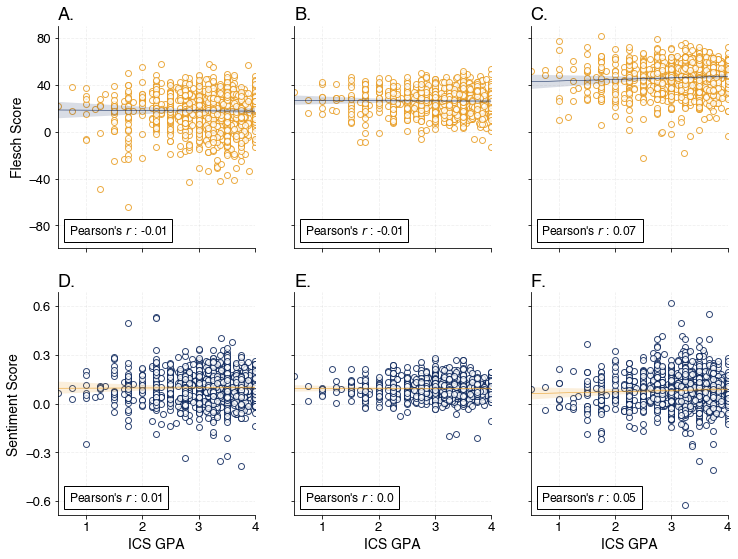

In [2]:
score_read_vs_gpa(merge_path, figure_path)

In [3]:
grp_by = ['Main panel']
grouper(df, uniq, grp_by, table_path, 'Panel_groupby.csv').set_index('Main panel')

,Number ICS,% Total ICS,FTE,Doctoral Degrees,Total Income (£bn)
Main panel,,,,,
A,1419,22.31,19763.11,46854.13,22.41
B,1268,19.93,17972.29,51859.17,14.34
C,2146,33.74,23292.24,38122.04,3.61
D,1528,24.02,13946.03,22685.49,1.25


In [4]:
grp_by = ['Main panel', 'Unit of assessment name']
grouper(df, uniq, grp_by, table_path, 'UOA_groupby.csv').set_index('Main panel')

,Unit of assessment name,Number ICS,% Total ICS,FTE,Doctoral Degrees,Total Income (£bn)
Main panel,,,,,,
A,"Agriculture, Food and Veterinary Sciences",103,1.62,1293.00,2904.16,1.03
A,"Allied Health Professions, Dentistry, Nursing ...",393,6.18,4703.83,9203.27,1.69
A,Biological Sciences,192,3.02,2816.49,9245.30,3.90
A,Clinical Medicine,254,3.99,4878.50,12174.02,9.88
A,"Psychology, Psychiatry and Neuroscience",326,5.12,4039.77,10528.31,2.68
A,"Public Health, Health Services and Primary Care",151,2.37,2031.52,2799.07,3.23
B,Chemistry,113,1.78,1389.02,6687.21,1.55
B,Computer Science and Informatics,271,4.26,2937.61,6517.63,1.35
B,Earth Systems and Environmental Sciences,148,2.33,1771.97,4061.62,1.27


Panel C ICS GPA mean:  3.07
Panel D ICS GPA mean:  3.13


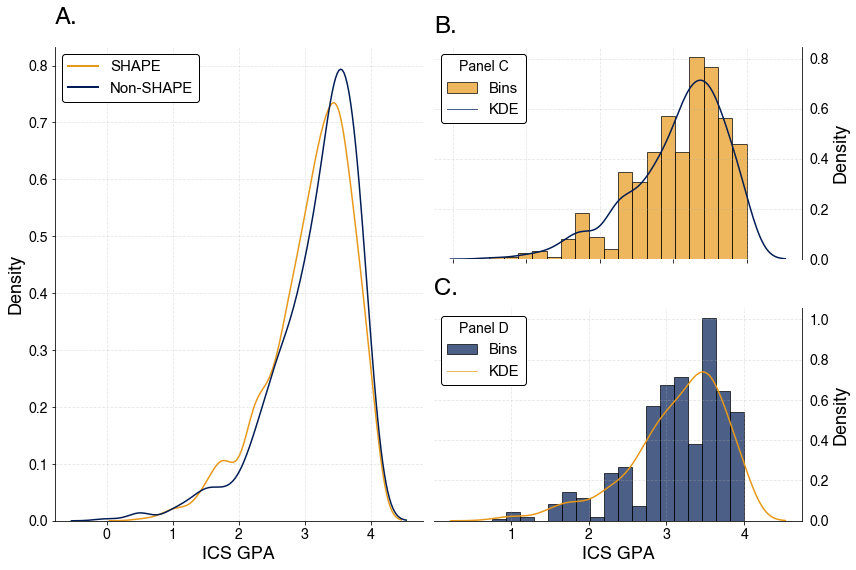

In [5]:
make_simple_scores_figure(df, figure_path, out_path)

Corr(GPA,  FTE) for all ICS is:  0.006
Corr(GPA,  FTE) for Non-SHAPE is:  0.032
Corr(GPA,  FTE) for SHAPE is:  -0.012
Corr(GPA, Total Income) for all ICS is:  0.033
Corr(GPA, Total Income) for Non-SHAPE is:  0.074
Corr(GPA, Total Income) for SHAPE is:  0.009
Corr(GPA, Number Degrees) for all ICS is:  0.023
Mean GPA is  3.12
Mean GPA for Non-SHAPE is  3.168
Mean GPA for SHAPE is  3.1
Mean GPA for Non-SHAPE (FTE>=100) is  3.558
Mean GPA for SHAPE (FTE>=100) is  3.368
Mean GPA for Non-SHAPE (50<=FTE) is  3.012
Mean GPA for SHAPE (50<FTE) is  3.051
Mean GPA for Non-SHAPE (1 ICS submitted) is  3.244
Mean GPA for SHAPE (1 ICS submitted) is  3.04
Mean GPA for Non-SHAPE (>1 ICS submitted) is  3.166
Mean GPA for SHAPE (>1 ICS submitted) is  3.102


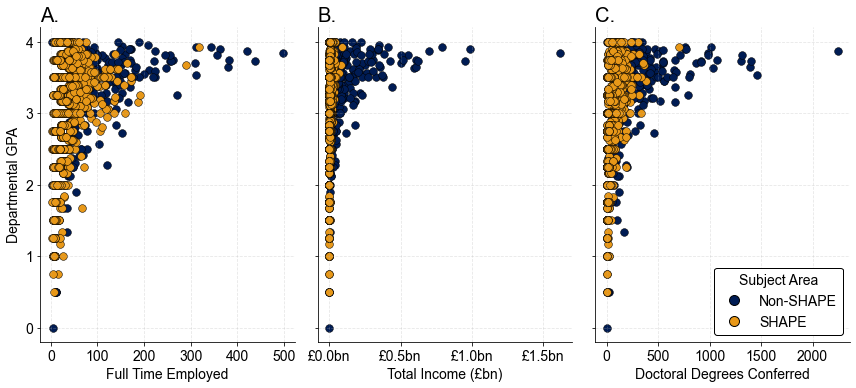

In [6]:
make_gpa_vs_environment(figure_path, df)

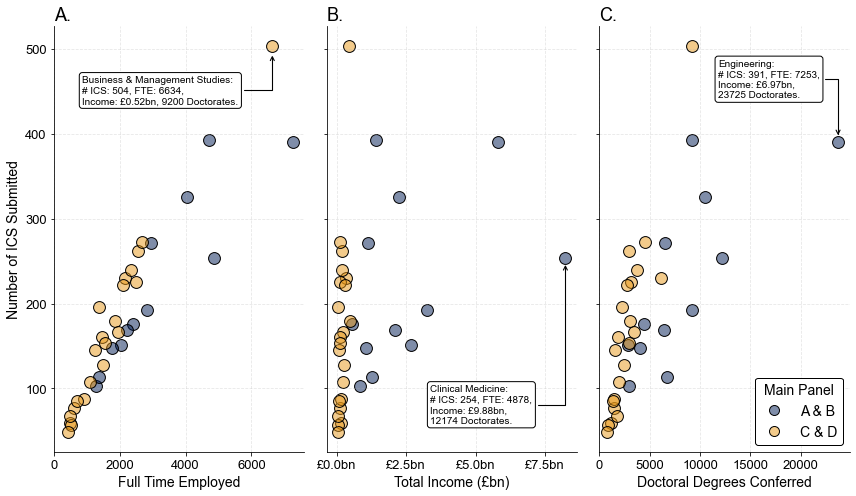

In [7]:
groupby_plotter(grouper(df, uniq, grp_by, table_path, 'UOA_groupby.csv'),
                figure_path,'Number_ICS_Submitted')

(12, 6)


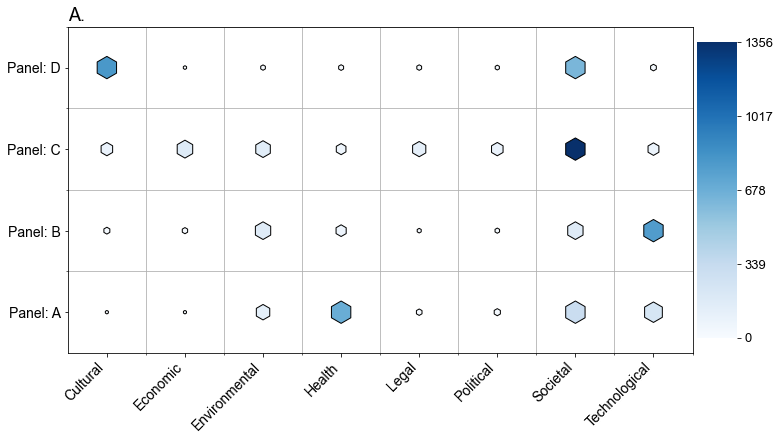

In [8]:
dfA = df[df['Main panel']=='A'].groupby('Summary impact type')['Summary impact type'].count()
dfB = df[df['Main panel']=='B'].groupby('Summary impact type')['Summary impact type'].count()
dfC = df[df['Main panel']=='C'].groupby('Summary impact type')['Summary impact type'].count()
dfD = df[df['Main panel']=='D'].groupby('Summary impact type')['Summary impact type'].count()
dfA = pd.DataFrame(dfA).rename({'Summary impact type': 'Panel: A'}, axis=1)
dfB = pd.DataFrame(dfB).rename({'Summary impact type': 'Panel: B'}, axis=1)
dfC = pd.DataFrame(dfC).rename({'Summary impact type': 'Panel: C'}, axis=1)
dfD = pd.DataFrame(dfD).rename({'Summary impact type': 'Panel: D'}, axis=1)
df_merge = pd.merge(pd.DataFrame(dfA), pd.DataFrame(dfB), how='left', left_index=True, right_index=True)
df_merge = pd.merge(df_merge, pd.DataFrame(dfC), how='left', left_index=True, right_index=True)
df_merge = pd.merge(df_merge, pd.DataFrame(dfD), how='left', left_index=True, right_index=True)
a = df_merge.melt(ignore_index=False).reset_index()
heatmap(
    x=a['Summary impact type'],
    y=a['variable'],
    figsize = (12, 6),
    figure_path = figure_path,
    filename = 'panel_by_type',
    size=a['value'],
    color=a['value'],
    color_range=[0, a['value'].max()],
    marker='h'
)

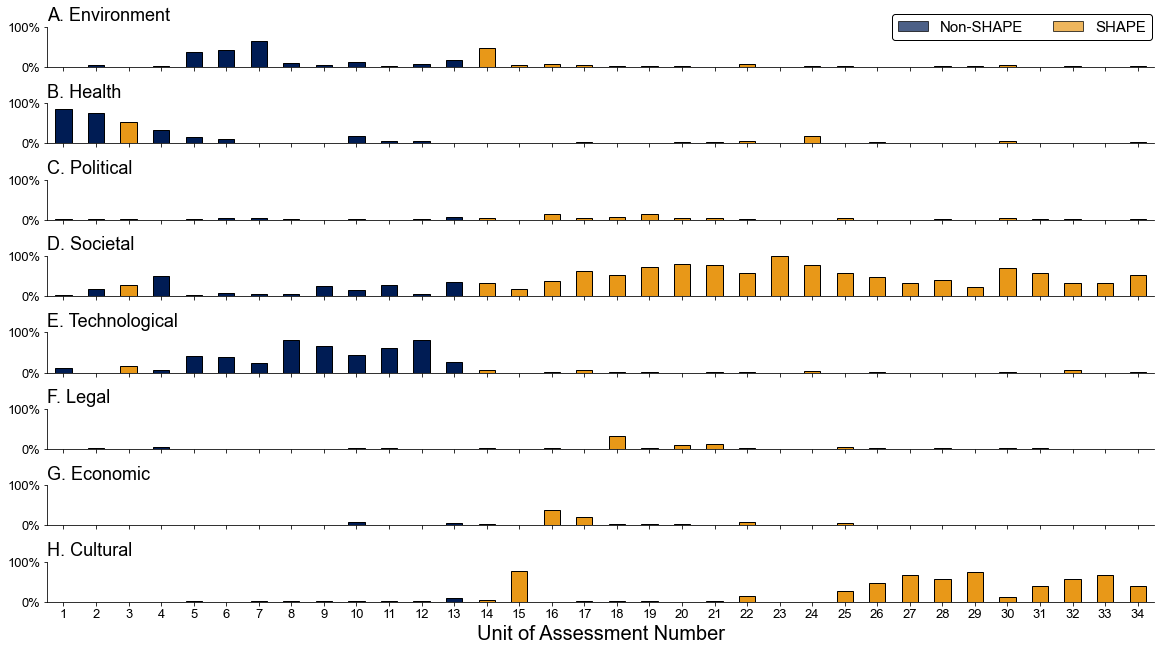

In [9]:
plot_impacttype_vs_uoa(figure_path, df)

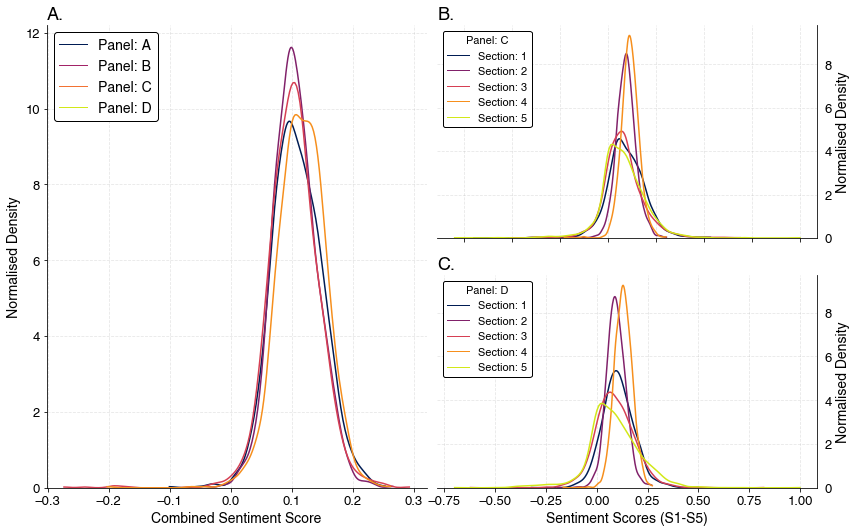

In [10]:
dfe = pd.read_pickle(os.path.join(merge_path, 'merged_with_text_features.pkl'))
make_hist_by_panel(dfe, figure_path, 'sentiment_by_panel', 'sentiment', False)

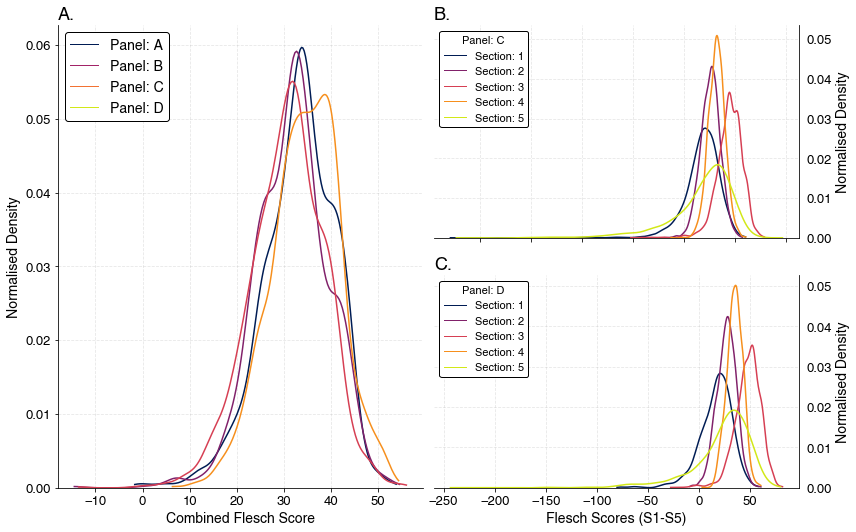

In [11]:
make_hist_by_panel(dfe, figure_path, 'flesch_by_panel', 'flesch', False)

In [12]:
df['Text_Combined'] = df['1. Summary of the impact'].astype(str) + \
                      df['2. Underpinning research'].astype(str) + \
                      df['3. References to the research'].astype(str) +\
                      df['4. Details of the impact'].astype(str) +\
                      df['5. Sources to corroborate the impact'].astype(str)
df['Text_Combined'] = df['Text_Combined'].apply(clean_free_text)

In [13]:
support_path = os.path.join(os.getcwd(), '..', '..', 'data', 'support')
df = make_lemmas(df, 'Text_Combined', table_path)

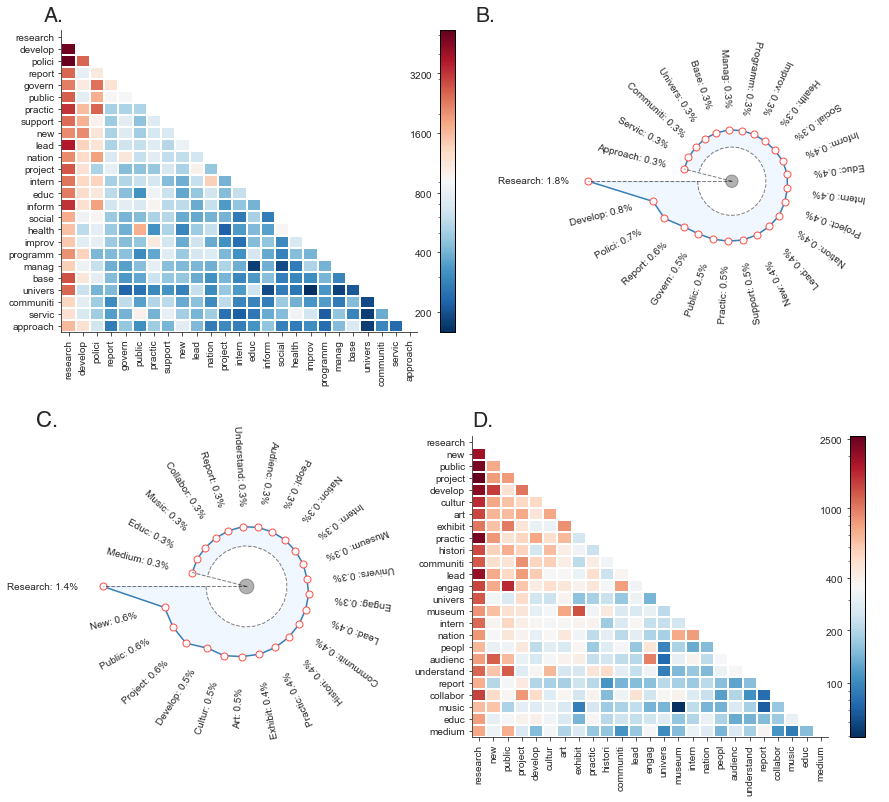

In [14]:
make_word_vis(df[df['Main panel']=='C'], df[df['Main panel']=='D'], 'Text_Combined',
              figure_path, support_path)

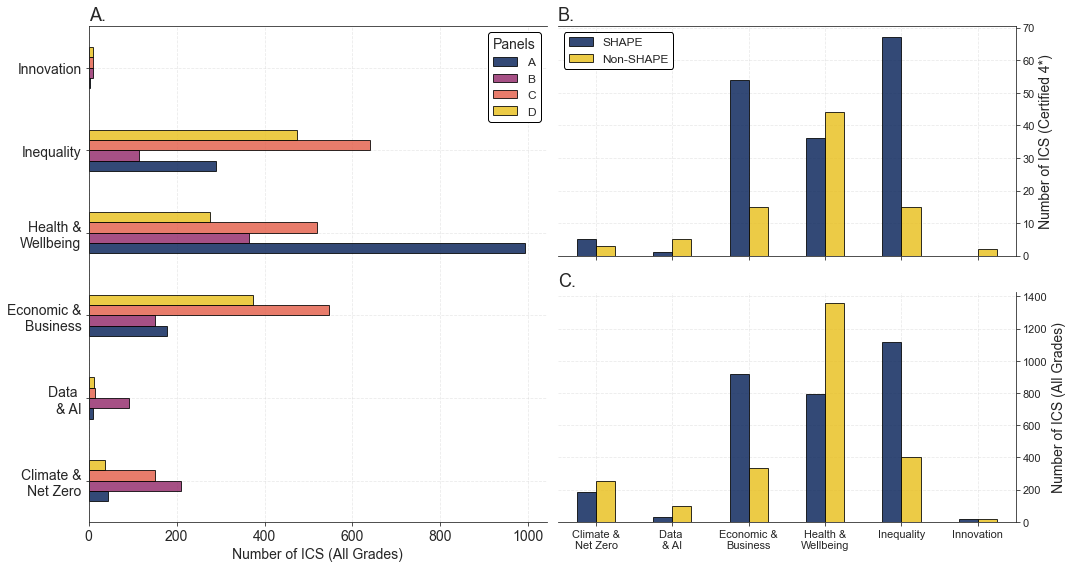

In [15]:
make_keyword_figure()